# __The Science of Data Mining (Part3) - Data Clustering__


## <font color="SeaGreen">__Insurance Company - Case Study__</font><br>


***
### 📖 __Introduction__
    
Within the scope of __Data Mining__, it was proposed a project, where the worker"s ability to build a Predictive Analytics model in accordance with the The CRoss Industry Standard Process for Data Mining (CRISP-DM) process, would be tested. There is one business problem from __PT Insurance__, a portuguese long standing insurance company that serves a wide array of insurance services.
    
***
### 📊 __Business Situation__

PT Insurance is a portuguese long standing insurance company that
serves a wide array of insurance services: Motor, Household, Health, Life and
Work Compensation. Although primarily serves portuguese customers, a
significant portion of their customer acquisition comes from their web site.
Customers can sign up to company services through their branches, by telephone, or
on the web site.

In 2016, became one of the largest insurers in Portugal. However, the lack
of a data driven culture in the company ultimately led to poorly maintained
databases over the years. Company is trying to make better use of the database it
has regarding its customers. So far, it has simply mass-marketed everything.
All potential and existing customers get the same promotions, and there are no
attempts to identify target markets for cross-selling opportunities. Now, 
wants start differentiating customers, and developing more focused programs.

It provided you an ABT (Analytic Based Table) with data regarding a sample of
10.290 Customers from its active database. These are customers that had at
least one insurance service with the company at the time the dataset was
extracted. Your job is to segment the database and find the relevant clusters
of customers. To do this, we suggest you segment the customers using different
perspectives and approaches, as well as combine and analyze the results. PT Insurance
would like to understand the value and demographics of each customer segment,
as well as understand which types of insurance they will be more interested in.
    
### 💾 __Metadata__

| Variable 		      | Description                              | Additional Information |
|---------------------|------------------------------------------|------------------------|
| ID 		          | ID 		                                 |                        |
| First Policy 		  | Year of the customer’s first policy      | (1)                    |
| Birthday            | Customer’s Birthday Year                 | (2)                    |
| Education           | Academic Degree                          |                        |
| Salary              | Gross monthly salary (€) 		         |                        |
| Area 		          | Living area 		                     | (3)                    |
| Children 		      | Binary variable (Y=1) 		             |                        |
| CMV 		          | Customer Monetary Value 		         | (4)                    |
| Claims 		      | Claims Rate 		                     | (5)                    |
| Motor 		      | Premiums (€) in LOB: Motor 		         | (6)                    |
| Household 		  | Premiums (€) in LOB: Household 		     | (6)                    |
| Health 		      | Premiums (€) in LOB: Health 		     | (6)                    |
| Life 		          | Premiums (€) in LOB: Life 		         | (6)                    |
| Work Compensation   | Premiums (€) in LOB: Work Compensations  | (6)                    |

<br>
<details open>
    <summary> 
       <font color="SeaGreen" size =3>To see/hide Additional Information click here:</font>
    </summary><br>

> 1. May be considered as the first year as a customer
> 2. The current year of the database is 2016
> 3. No further information provided about the meaning of the area codes
> 4. Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
> 5. Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
> 6. Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current year, paid in previous one(s).

Notice the data was stored in a SAS database file. There may be some intricacies when
reading this file type using Python. Make sure the data is being
imported properly and that you remove (before or after converting it to a
pandas data frame) any irrelevant rows/columns you may find.

<font color="SeaGreen" size =3>Expected outcomes</font>

> 1. Explore the data and identify the variables that should be used to segment customers.
> 2. Identify customer segments
> 3. Justify the number of clusters you chose (taking in consideration the business use as well).
> 4. Explain the clusters found.
> 5. Suggest business applications for the findings and define general marketing
   approaches for each cluster.

**Note:** Invest time into evaluating your preprocessing pipeling, thinking
how you want to do your clustering, possible approaches, and advantages or
disadvantages of different decisions.

***
### 📋 Index <a class="anchor"><a id="index"></a>
    
> ### [<font color="white"> 1. Data Collection</font>](#one)
>> #### [<font color="lightGrey"> 1.1 Importing Libraries</font>](#oneone)
>> #### [<font color="lightGrey"> 1.2 Importing Dataset</font>](#onetwo)    
> ### [<font color="White"> 2. Self Organized Maps</font>](#two)
>> #### [<font color="lightGrey"> 2.1 U-Matrix</font>](#twoone)
>> #### [<font color="lightGrey"> 2.2 Hit-Map</font>](#twotwo)
>> #### [<font color="lightGrey"> 2.3 Component Planes</font>](#twothree)
> ### [<font color="White"> 3. Clustering</font>](#three)
>> #### [<font color="lightGrey"> 3.1 Hierarchical-Based Clustering</font>](#threeone)
>>> ##### [<font color="Grey"> 3.1.1 Agglomerative Clustering</font>](#threeoneone)
>>> ##### [<font color="Grey"> 3.1.2 Divisive Clustering</font>](#threeonetwo)
>> #### [<font color="lightGrey"> 3.2 Centroid-Based Clustering</font>](#threetwo)
>>> ##### [<font color="Grey"> 3.2.1 K-Means and K-Means++</font>](#threetwoone)
>>>> ##### [<font color="Grey"> 3.2.1.1 Elbow Method Evaluation</font>](#threetwooneone)
>>>> ##### [<font color="Grey"> 3.2.1.2 Silhouette Method Evaluation</font>](#threetwoonetwo)
>>> ##### [<font color="Grey"> 3.2.2 K-Medoids</font>](#threetwotwo)
>>>> ##### [<font color="Grey"> 3.2.2.1 Elbow Method Evaluation</font>](#threetwotwoone)
>>>> ##### [<font color="Grey"> 3.2.2.2 Silhouette Method Evaluation</font>](#threetwotwotwo)
>> #### [<font color="lightGrey"> 3.3 Density-Based Clustering</font>](#threethree)
>>> ##### [<font color="Grey"> 3.3.1 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</font>](#threethreeone)
>>>> ##### [<font color="Grey"> 3.3.1.1 Epsilon Decision by K-Distance Plot Evaluation</font>](#threethreeoneone)


***

*** 
## <font color="White"> 1 Data Collection <a class="anchor" id="one"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
### <font color="White"> 1.1 Importing Libraries <a class="anchor" id="oneone"></a>

[<font color="grey">Back to Index </font>](#index)


In [369]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from minisom import MiniSom
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Disable Warnings
warnings.filterwarnings("ignore", category=FutureWarning)


*** 
### <font color="White"> 1.2 Importing Dataset <a class="anchor" id="onetwo"></a>

[<font color="grey">Back to Index </font>](#index)

In [284]:
# Retrive clean DataFrames from Part 1 and 2
%store -r df_norm
%store -r df_stand
%store -r df

df_norm = df_norm.copy()
df_stand = df_stand.copy()
df = df.copy()

***
## <font color="White">2. Self Organized Map </font> <a class="anchor" id="two"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
### <font color="White"> 2.1 U-Matrix <a class="anchor" id="twoone"></a>

[<font color="grey">Back to Index </font>](#index)

In [139]:
# Get the number of columns

mini_som_net = MiniSom(
    x=30, 
    y=30, 
    input_len=len(df_norm.columns), 
    sigma=1.5, 
    learning_rate=0.05, 
    neighborhood_function='gaussian',
    topology='hexagonal',
    activation_distance='euclidean',
    random_seed=0
)

mini_som_net.train_random(df_norm.to_numpy(), 100000)

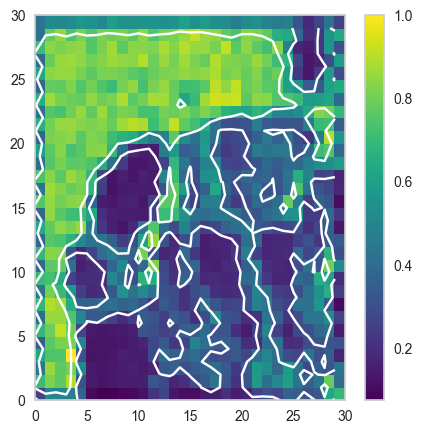

In [140]:
# Plot U-Matrix
plt.figure(figsize=(5,5))
plt.pcolor(mini_som_net.distance_map().T, cmap= 'viridis')
plt.colorbar()

# Contour lines to highlight clusters
contour_levels = np.linspace(0, 1, 4) 
plt.contour(mini_som_net.distance_map().T, levels=contour_levels, colors='white')


*** 
### <font color="White"> 2.2 Hit-Map <a class="anchor" id="twotwo"></a>

[<font color="grey">Back to Index </font>](#index)

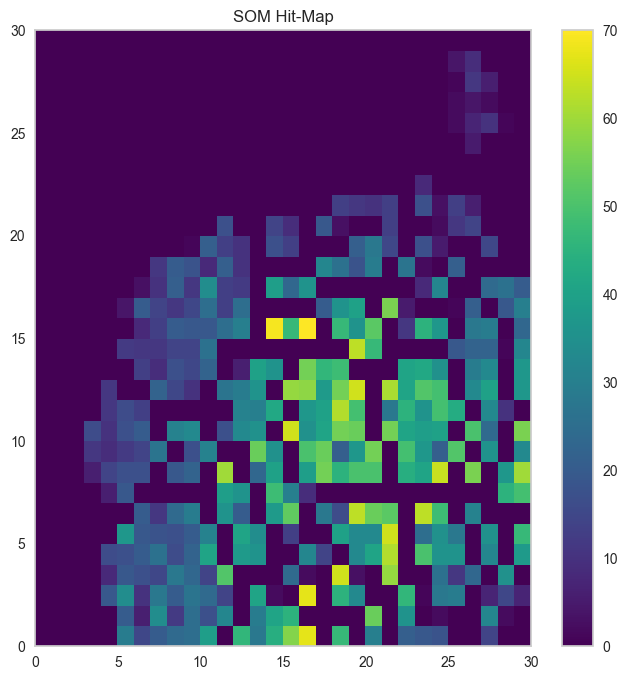

In [141]:
# Get the BMU indices for each input vector
bmus = np.array([mini_som_net.winner(x) for x in df_norm.to_numpy()])

# Count the number of times each neuron was the BMU
hits = np.zeros((mini_som_net.get_weights().shape[0], mini_som_net.get_weights().shape[1]))

for bmu in bmus:
    hits[bmu[0], bmu[1]] += 1

# Plot the hit-map
plt.figure(figsize=(8, 8))
plt.pcolor(hits.T, cmap='viridis', shading='auto')
plt.colorbar()
plt.title('SOM Hit-Map')
plt.show()


*** 
### <font color="White"> 2.3 Component Planes <a class="anchor" id="twothree"></a>

[<font color="grey">Back to Index </font>](#index)

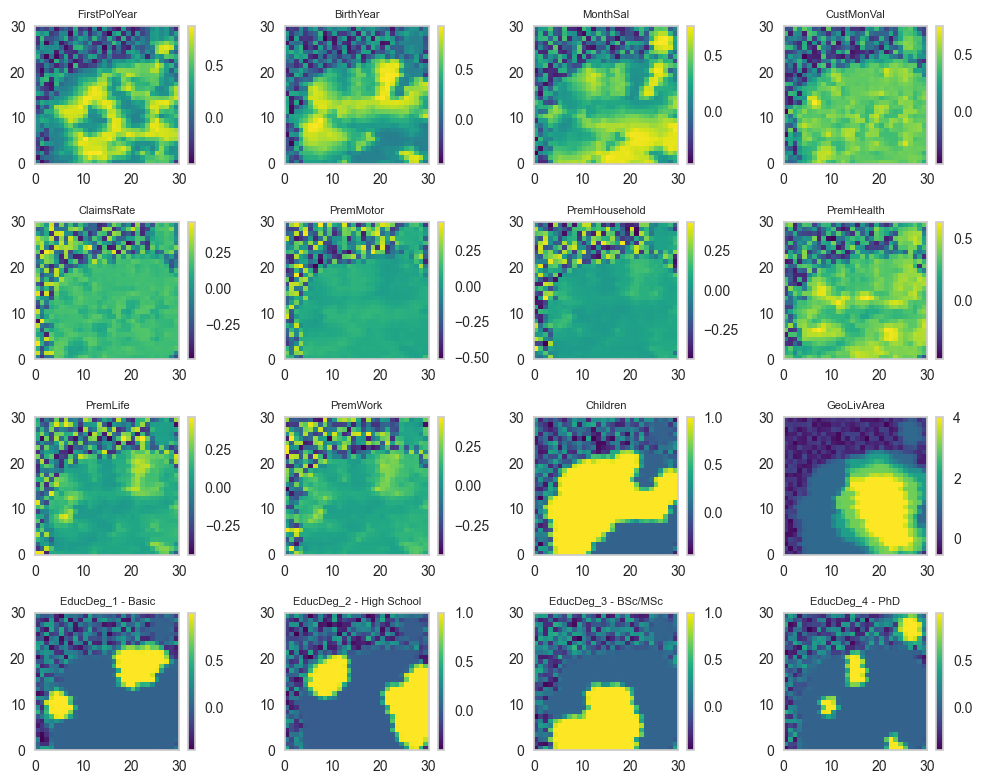

In [142]:
# Get the weight vectors for each neuron in the SOM
weights = mini_som_net.get_weights()

# Number of rows and columns for the subplots
num_rows = len(df_norm.columns) // 4
num_cols = 4

# Plot component planes with colorbars
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows))

for i in range(num_rows):
    for j in range(num_cols):
        ax = axs[i, j]
        feature_index = i * num_cols + j
        if feature_index < len(df_norm.columns):
            column_name = df_norm.columns[feature_index]
            cax = ax.pcolor(weights[:, :, feature_index].T, cmap='viridis')
            ax.set_title(f'{column_name}', fontsize=8)
            fig.colorbar(cax, ax=ax)  # Add colorbar to each subplot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

***
## <font color="White">3. Clustering </font> <a class="anchor" id="three"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
### <font color="White"> 3.1 Hierarchical-Based Clustering <a class="anchor" id="threeone"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
#### <font color="White"> 3.1.1 Agglomerative Clustering <a class="anchor" id="threeoneone"></a>

[<font color="grey">Back to Index </font>](#index)

In [143]:
def silhouette_scores(data : pd.DataFrame, max_k : int):
    '''
    This function measures the performance of clustering based on silhouette score for diferent linkage methods  
    '''
    
    linkage_methods = ['ward', 'complete', 'average', 'single']
    scores = []

    for k in range(2, max_k + 1):
        row = []
        for link in linkage_methods:
            clustering = AgglomerativeClustering(n_clusters=k, linkage=link)
            labels = clustering.fit_predict(data)
            score = silhouette_score(data, labels)
            row.append(score)
        scores.append(row)

    return pd.DataFrame(scores, index=range(2, max_k + 1), columns=linkage_methods)

max_clusters = 50
result_df = silhouette_scores(df_norm, max_clusters)

fig = px.line(
    result_df, 
    x=result_df.index, 
    y=result_df.columns, 
    markers=True, 
    line_shape='linear'
)

fig.update_layout(
    title_text='Silhouette plot for various hierarchical methods',
    title_x=0.5,  # Center the title
    xaxis_title='Number of clusters',
    yaxis_title='Silhouette Score',
    xaxis=dict(autorange="reversed"),  # Invert X-axis
)

fig.show()

* In terms of score, the higher scores are observed between 0.3 and 0.4 for linkages Ward, Complete, and Average until 6 clusters, while the single linkage method is directly disregarded. This is often the case since the single method is highly sensitive to outliers and noise, even after cleaning the data in Part 1 and 2, and normalizing data where noise is always present.

* Average linkage achieved the highest score overall in 8 clusters and in the average of the total number of clusters.

* All methods cross over at cluster 4, and even in this cluster, average linkage is the highest.

This suggests that in agglomerative hierarchical clustering for this dataset, the average linkage method is the most robust to apply, and choosing 4 clusters might be a good option as it has a peak in score and is a point of convergence for multiple linkage methods.

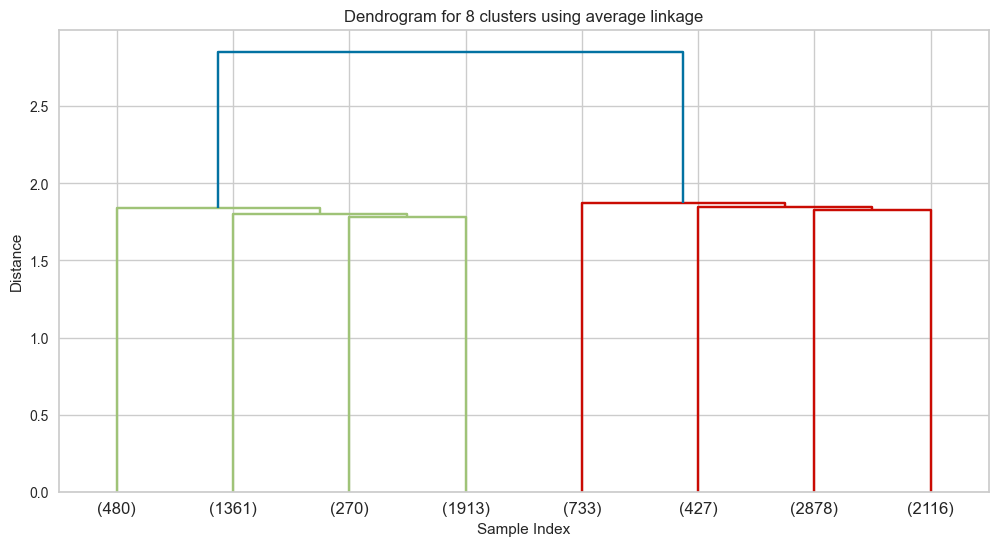

In [144]:
# Assuming df_norm is your DataFrame with normalized data
data = df_norm.values
n_clusters = 8

# Perform hierarchical clustering with the selected parameters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels = clustering.fit_predict(data)

# Generate linkage matrix
linkage_matrix = linkage(data, method='average')

# Generate and plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=n_clusters)
plt.title(f'Dendrogram for {n_clusters} clusters using average linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



*** 
#### <font color="White"> 3.1.2 Divisive Clustering <a class="anchor" id="threeonetwo"></a>

[<font color="grey">Back to Index </font>](#index)

This method, also known as top-down clustering, is precisely the opposite of Agglomerative Clustering. It considers all data points as a single cluster initially, and in each iteration, separates them from clusters that aren't comparable. In the end, N clusters are left, and this is also supported by the use of a dendrogram for final interpretation. For this clustering method, it is often suitable to use the K-Means algorithm. Further tests will be conducted, and since K-Means could potentially be more accurate in a non-hierarchical approach, we will proceed to centroid-based clustering.

***
## <font color="White">3.2 Centroid-Based Clustering </font> <a class="anchor" id="threetwo"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
#### <font color="White"> 3.2.1 K-Means and K-Means++ <a class="anchor" id="threetwoone"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
##### <font color="White"> 3.2.1.1 Elbow Method Evaluation <a class="anchor" id="threetwooneone"></a>

[<font color="grey">Back to Index </font>](#index)

In [145]:
def elbow_evaluate(data : pd.DataFrame, max_clusters : int):

    wcss = [] 
    distorcion = []

    for i in range(2, max_clusters + 1):
        kmeans = KMeans(
            n_clusters = i,
            random_state = 0
        )
        kmeans.fit(data.values)
        
        distorcion.append(sum(np.min(cdist(data.values, kmeans.cluster_centers_,
                                            'euclidean'), axis=1)) / data.shape[0])
        wcss.append(kmeans.inertia_)

    fig = px.line(
        x=range(2, max_clusters + 1), 
        y=wcss, 
        markers=True, 
        line_shape='linear', 
        labels={'x': 'Number of Clusters', 'y': 'WCSS (Inertia)'}
    )

    # Add vertical lines at cluster numbers 5 and 8 clusters
    fig.add_shape(type='line', x0=15, x1=15, y0=0, y1=max(wcss), line=dict(color='red', width=2))
    fig.add_shape(type='line', x0=17, x1=17, y0=0, y1=max(wcss), line=dict(color='red', width=2))

    # Update layout for better readability
    fig.update_layout(
        title_text='Elbow Plot',
        title_x=0.5,
        xaxis_title='Number of Clusters',
        yaxis_title='WCSS (Inertia)',
        showlegend=False
    )

    # Show
    fig.show()

elbow_evaluate(df_norm, 50)

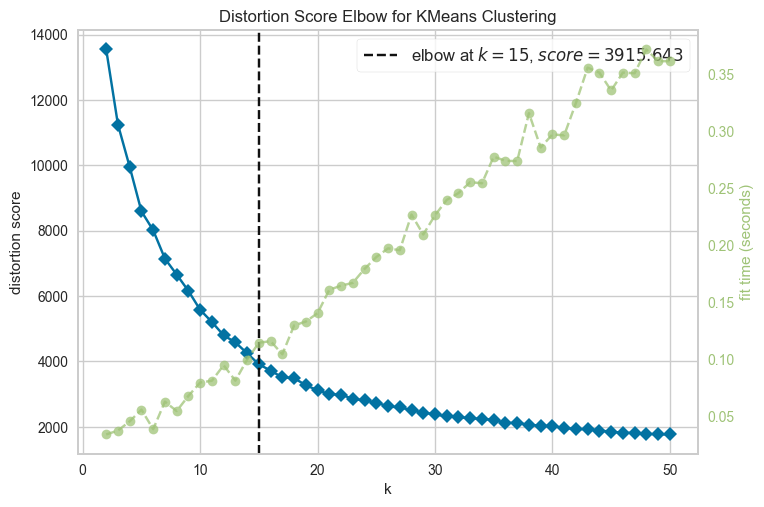

In [146]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,51))

visualizer.fit(df_norm)
visualizer.show()
plt.show()


*** 
##### <font color="White"> 3.2.1.2 Silhouette Method Evaluation <a class="anchor" id="threetwoonetwo"></a>

[<font color="grey">Back to Index </font>](#index)

In [147]:
def silhouette_evaluate(data : pd.DataFrame, max_clusters : int):

    silhouette_scores = [] 

    for i in range(2, max_clusters + 1):
        kmeans = KMeans(
            n_clusters = i,
            random_state = 0
        )
        labels = kmeans.fit_predict(data)
        
        # Compute silhouette scores for each sample
        silhouette_values = silhouette_score(data, labels)
        
        # Calculate average silhouette score
        silhouette_scores.append(silhouette_values)

    fig = px.line(
        x=range(2, max_clusters + 1), 
        y=silhouette_scores, 
        markers=True, 
        line_shape='linear', 
        labels={'x': 'Number of Clusters', 'y': 'Silhouette Score'}
    )

    # Update layout for better readability
    fig.update_layout(
        title_text='Silhouette Plot',
        title_x=0.5,
        xaxis_title='Number of Clusters',
        yaxis_title='Silhouette Score',
        showlegend=False
    )

    # Show
    fig.show()

silhouette_evaluate(df_norm, 50)

* The Silhouette evaluation suggests that 19 to 21 are the best candidates for K, supporting our final decision if this were an enterprise project, as explained above. 

* It's crucial to recognize that such differences in the number of clusters are common. It's important to remember that clustering is somewhat subjective, and our final decision on the number of clusters should always be supported by the data and the context of the problem.

In [149]:
# Define a sparated dataframe to include clusters labels
df_norm_clusters = df_norm.copy() 

kmeans = KMeans(n_clusters = 15, random_state = 0)
df_norm_clusters['kmeans_cluster'] = kmeans.fit_predict(df_norm)

In [150]:
def cluster_profile(data : pd.DataFrame, cluster_label : str):

    # Group by cluster and calculate the mean for each feature
    cluster_means = data.groupby(cluster_label).mean()

    # Create traces for each cluster
    lines = []
    for cluster_label, row in cluster_means.iterrows():
        line = go.Scatter(x=row.index, y=row.values, mode='lines+markers', name=f'Cluster {cluster_label}')
        lines.append(line)

    # Create layout
    layout = go.Layout(
        title='Average Values for Each Cluster in Each Feature',
        title_x=0.5,
        xaxis=dict(title='Features'),
        yaxis=dict(title='Average Values'),
        legend=dict(title='Cluster', orientation='v', x=1, y=1),
        width=1300,
        height=600
    )

    # Create figure
    fig = go.Figure(data=lines, layout=layout)

    # Show the plot
    fig.show()

cluster_profile(df_norm_clusters, 'kmeans_cluster')


*** 
#### <font color="White"> 3.2.2 K-Medoids <a class="anchor" id="threetwotwo"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
##### <font color="White"> 3.2.2.1 Elbow Method Evaluation <a class="anchor" id="threetwotwoone"></a>

[<font color="grey">Back to Index </font>](#index)

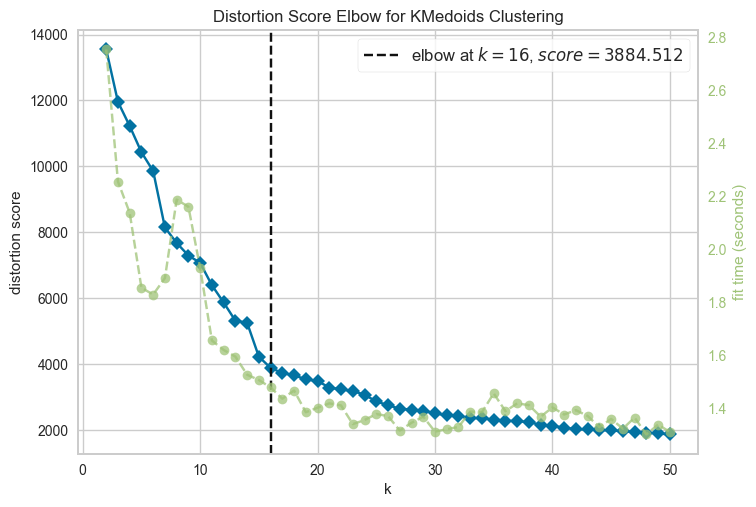

In [151]:
model = KMedoids(random_state=0, init="k-medoids++")

visualizer = KElbowVisualizer(model, k=(2,51))

visualizer.fit(df_norm)
visualizer.show()
plt.show()


*** 
##### <font color="White"> 3.2.2.2 Silhouette Method Evaluation <a class="anchor" id="threetwotwotwo"></a>

[<font color="grey">Back to Index </font>](#index)

In [133]:

def silhouette_evaluate_medoid(data : pd.DataFrame, max_clusters : int):

    silhouette_scores = [] 

    for i in range(2, max_clusters + 1):
        kmedoids = KMedoids(
            n_clusters = i,
            init="k-medoids++",
            random_state = 0
        )
        labels = kmedoids.fit_predict(data)
        
        # Compute silhouette scores for each sample
        silhouette_values = silhouette_score(data, labels)
        
        # Calculate average silhouette score
        silhouette_scores.append(silhouette_values)

    fig = px.line(
        x=range(2, max_clusters + 1), 
        y=silhouette_scores, 
        markers=True, 
        line_shape='linear', 
        labels={'x': 'Number of Clusters', 'y': 'Silhouette Score'}
    )

    # Update layout for better readability
    fig.update_layout(
        title_text='Silhouette Plot',
        title_x=0.5,
        xaxis_title='Number of Clusters',
        yaxis_title='Silhouette Score',
        showlegend=False
    )

    # Show
    fig.show()

silhouette_evaluate_medoid(df_norm, 50)


In [152]:
kmedoids = KMedoids(n_clusters=15, random_state=0, init="k-medoids++")
df_norm_clusters['kmedoids_cluster'] = kmedoids.fit_predict(df_norm_clusters)

In [156]:
selected_columns = list(df_norm.columns) + ['kmedoids_cluster']

cluster_profile(df_norm_clusters[selected_columns], 'kmedoids_cluster')

***
## <font color="White">3.3 Density-Based Clustering </font> <a class="anchor" id="threethree"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
#### <font color="White"> 3.3.1 Density-Based Spatial Clustering of Applications with Noise (DBSCAN) <a class="anchor" id="threethreeone"></a>

[<font color="grey">Back to Index </font>](#index)


*** 
##### <font color="White"> 3.3.1.1 Epsilon Decision by K-Distance Plot Evaluation <a class="anchor" id="threethreeoneone"></a>

[<font color="grey">Back to Index </font>](#index)

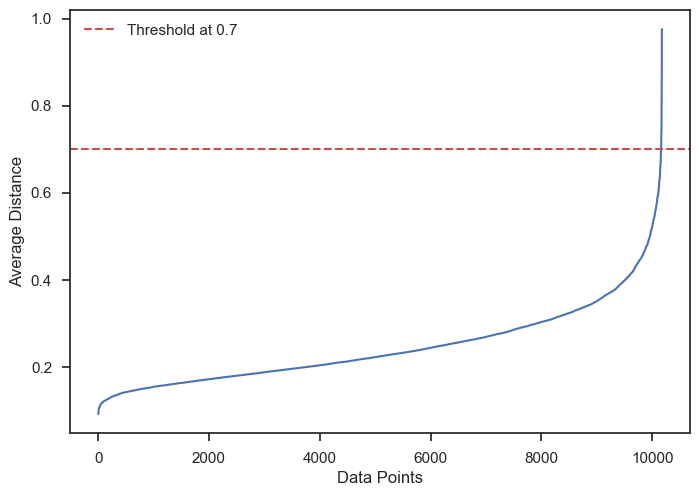

In [225]:
# Modeling data by KNN
nbors = NearestNeighbors(n_neighbors=20)
nbors.fit(df_norm)
distances, _ = nbors.kneighbors(df_norm)
avg_distances = np.mean(distances, axis=1)

plt.plot(np.sort(avg_distances))
plt.xlabel('Data Points')
plt.ylabel('Average Distance')

plt.axhline(y=0.7, color='r', linestyle='--', label='Threshold at 0.7')

plt.legend()
plt.show()

* By evaluating the K-Distance Plot, we can obtain a optimal epsilon value of 0.7 where  is the point maximum curvature.

* For min-sample does not make sense to take 1 because it will result in each point being a separate cluster. Therefore, it must be at least 3. Generally, it is twice the dimensions or dimensions +1. We will use dimensions * 2.

In [272]:
dbscan = DBSCAN(eps = 0.7,
    min_samples = len(df_norm.columns) * 2 ,
    metric = "euclidean",
    algorithm = 'kd_tree',
    )

df_norm_clusters['dbscan_cluster'] = dbscan.fit_predict(df_norm_clusters[list(df_norm.columns)]) 
df_norm_clusters['dbscan_cluster'].value_counts()

dbscan_cluster
 3     1318
 5     1033
 1     1003
 0      726
 8      705
 7      579
 12     486
 4      438
 6      400
 21     341
 18     340
 16     280
 14     276
 22     266
 17     248
 15     188
 11     186
 9      169
 25     154
 10     152
 23     140
 19     103
 20      98
 29      83
 27      82
 28      82
-1       80
 13      64
 2       63
 24      53
 26      42
Name: count, dtype: int64

In [273]:
selected_columns = list(df_norm.columns) + ['dbscan_cluster']

cluster_profile(df_norm_clusters[selected_columns], 'dbscan_cluster')

In [286]:
df = df.merge(df_norm_clusters[['kmeans_cluster', 'kmedoids_cluster', 'dbscan_cluster']],
                left_index=True, 
                right_index=True, 
                how='left'
        )

c:\Users\joaom\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



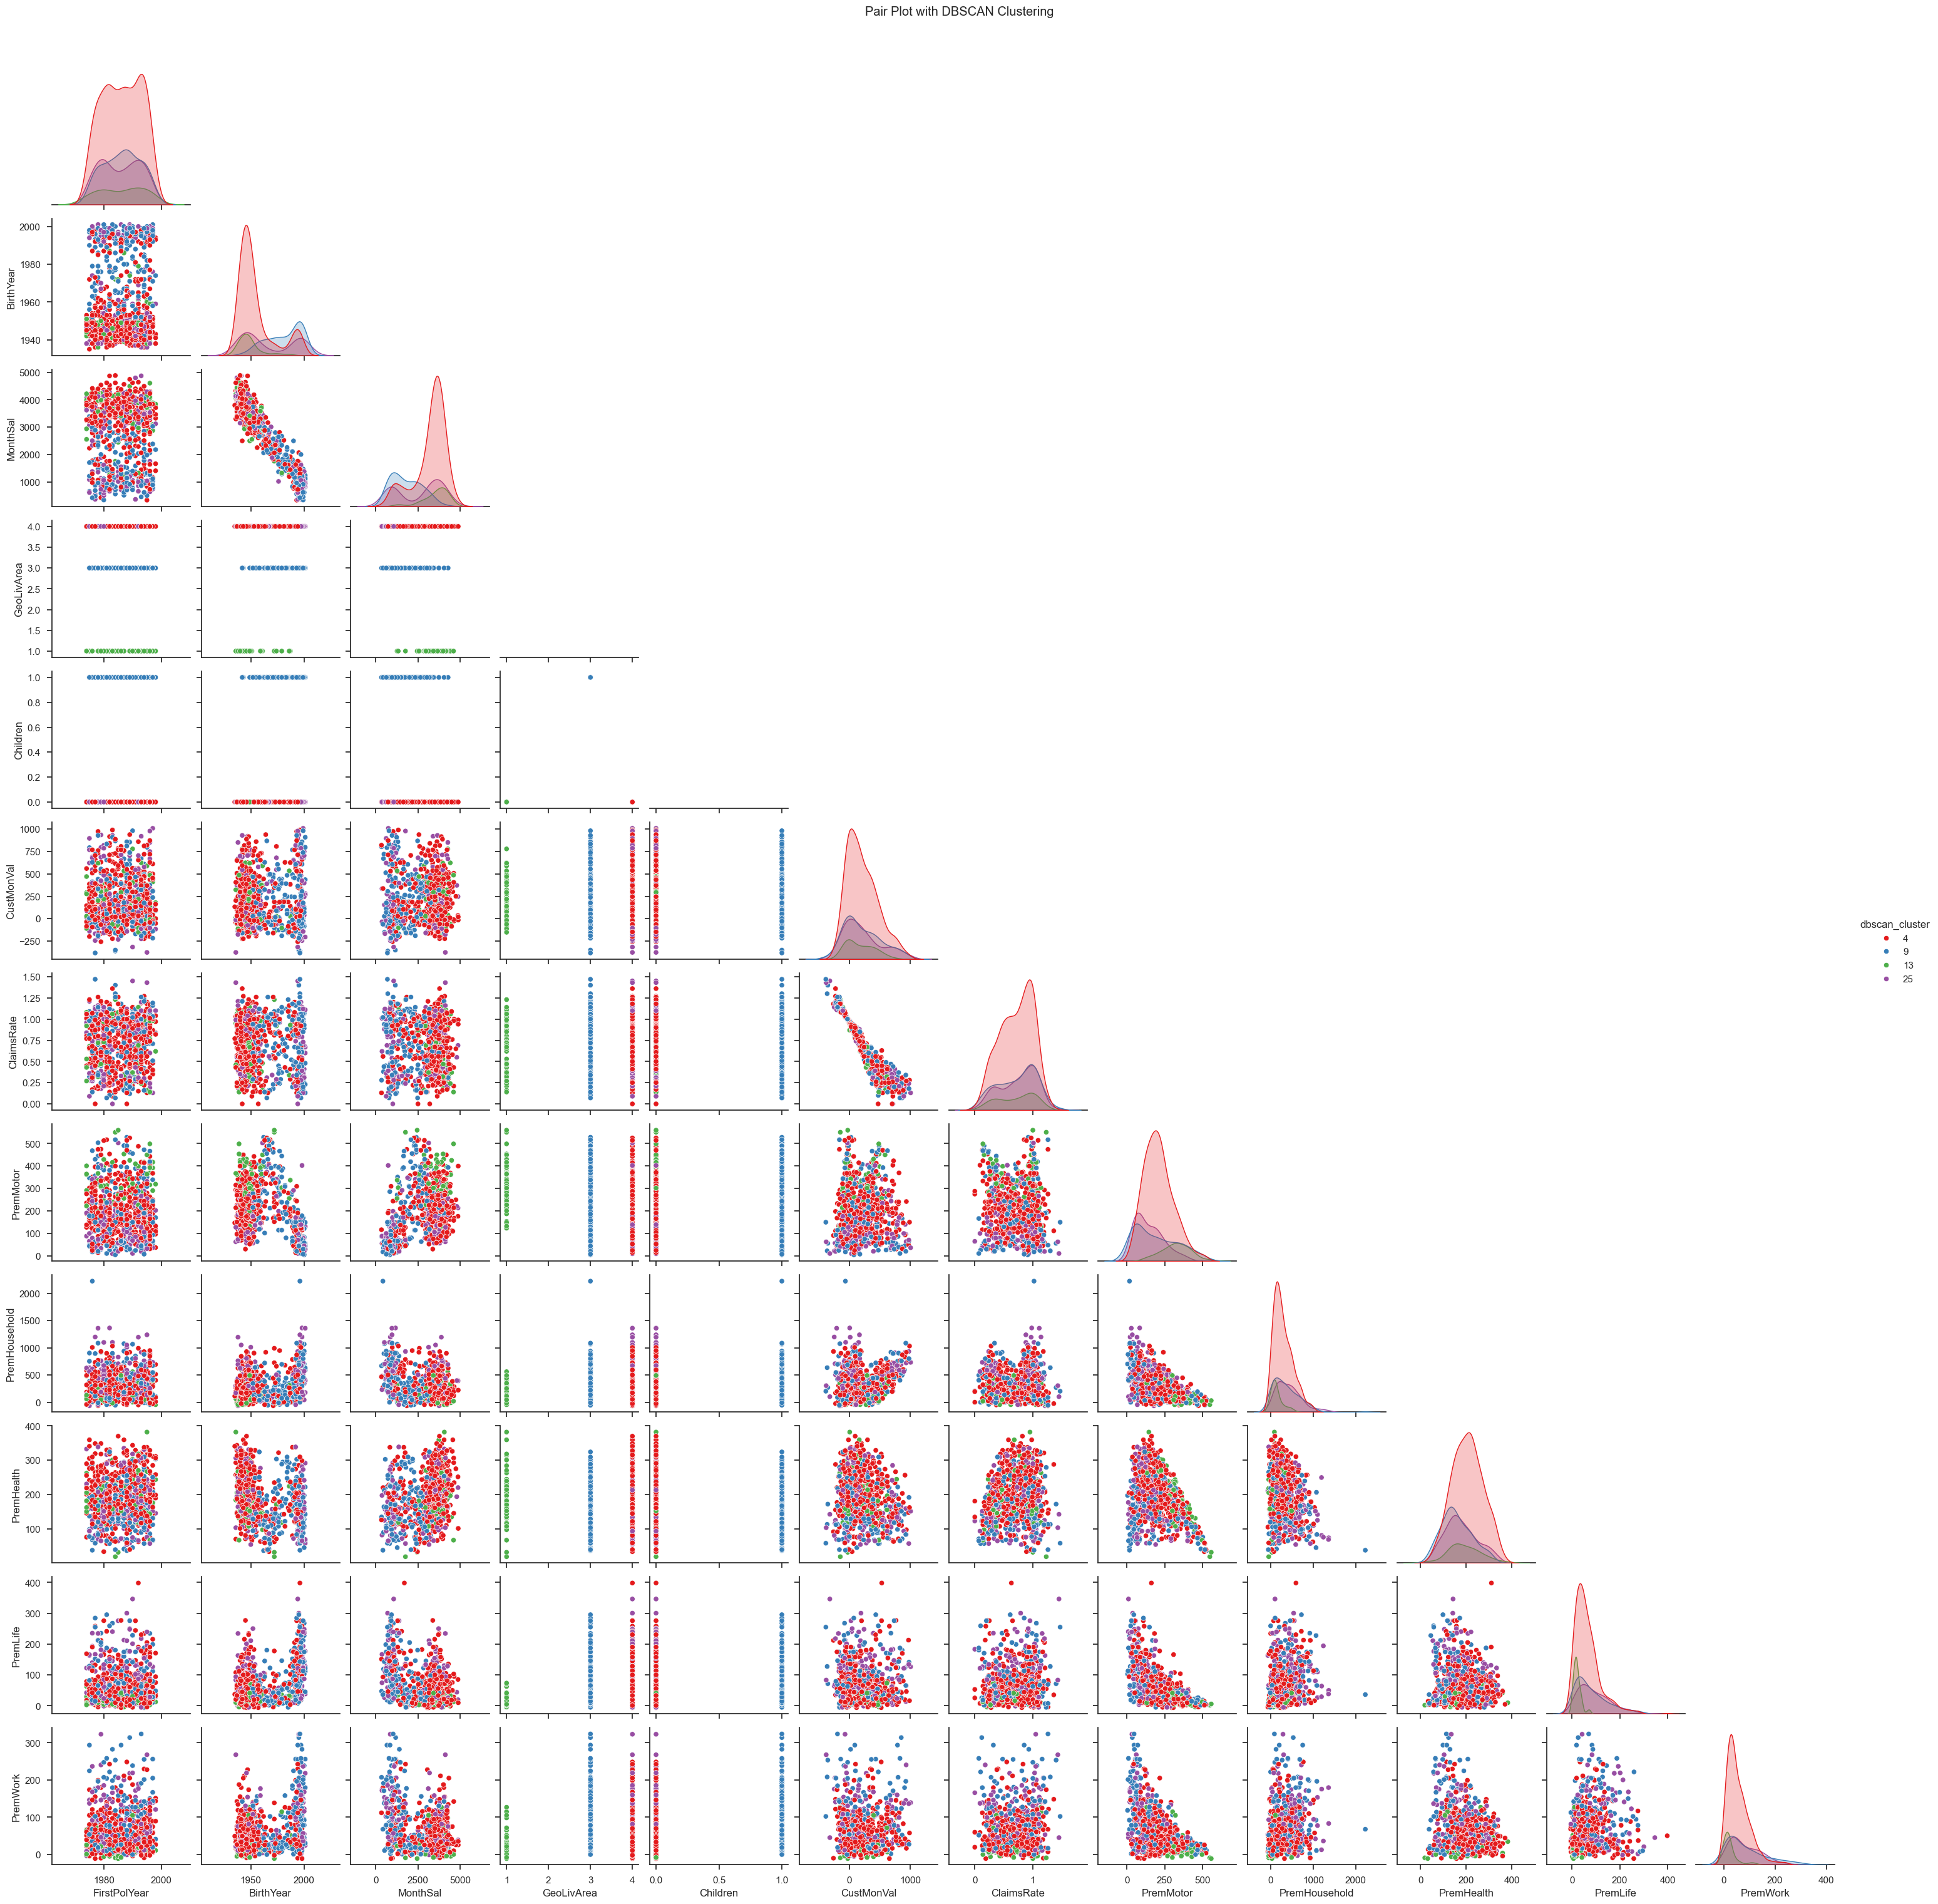

In [373]:
# Assuming df_norm_clusters is your DataFrame with clustering results
selected_clusters_df = df[df['dbscan_cluster'].isin([13, 9, 4, 25])]

# Specify the variables you want in the pair plot
selected_variables = ['FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal', 'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']

# Add the cluster information to the pair plot
sns.pairplot(selected_clusters_df[selected_variables + ['dbscan_cluster']], hue='dbscan_cluster', palette='Set1', corner=True)
plt.suptitle('Pair Plot with DBSCAN Clustering', y=1.02)
plt.show()

c:\Users\joaom\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



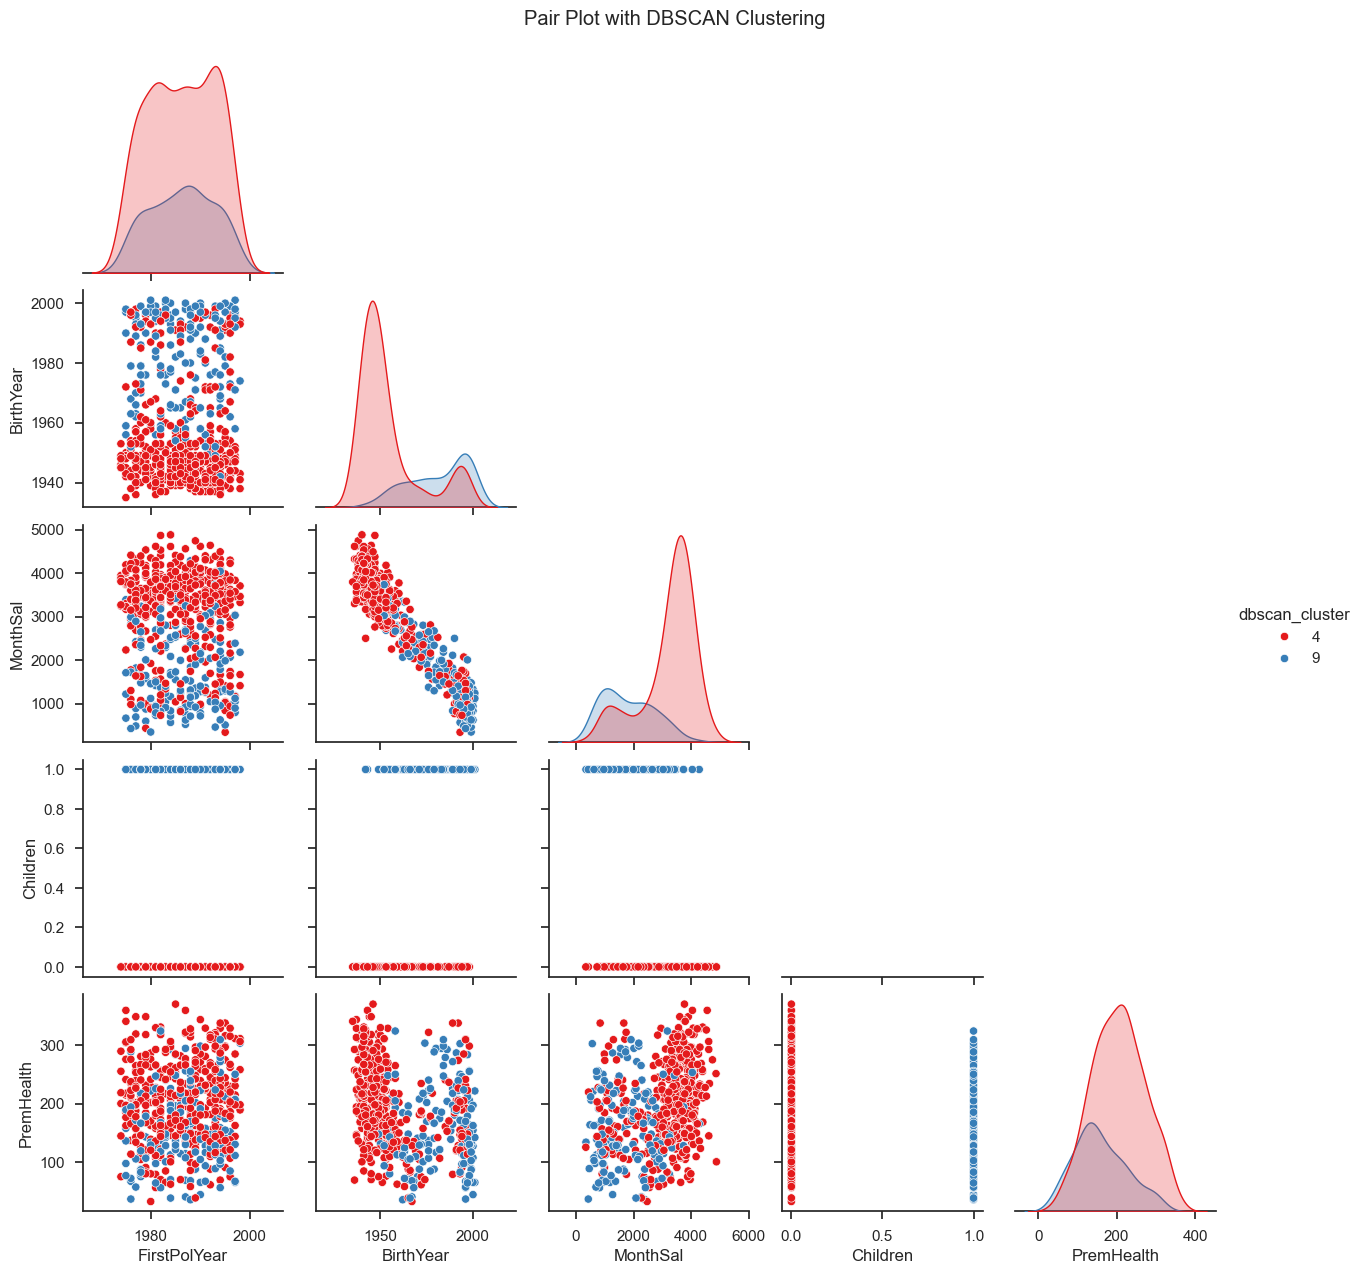

In [378]:
# Assuming df_norm_clusters is your DataFrame with clustering results
selected_clusters_df = df[df['dbscan_cluster'].isin([9, 4])]

# Specify the variables you want in the pair plot
selected_variables = ['FirstPolYear', 'BirthYear', 'MonthSal', 'Children','PremHealth']

# Add the cluster information to the pair plot
sns.pairplot(selected_clusters_df[selected_variables + ['dbscan_cluster']], hue='dbscan_cluster', palette='Set1', corner=True)
plt.suptitle('Pair Plot with DBSCAN Clustering', y=1.02)
plt.show()

We selected the social variables of these clients, including Birth Year, Monthly Salary, whether they have Children, and the Premium of Life Insurance. We can make the following observations:

* Clients in cluster 4 are older than clients in cluster 9.

* The majority of clients in cluster 4 have a higher Monthly Salary than those in cluster 9, suggesting that older people receive more on average.

* Our youngest clients (cluster 9) don't have children, while our older clients (cluster 4) do.
 
* Regarding Premium Health Insurance, cluster 4 has a higher premium than the younger cluster 9. This suggests that older clients contribute more to the premium health insurance, which is correct, as the associated revenues for the insurance company are higher, and the risk around these clients is also higher. Therefore, as an insurance company, it is normal to increase premium plans for older people to generate more income and manage the associated risks.